# How to spot a recession

Do we actually live in a recession currently? We are overwhelmed with information about the recession coming or not. Why would you want to spot a recession? 
- You can for sure invest correctly in the market
- Know that times might get a bit worse
- Generally recessions is a good time for investments as well

Ms Sahm in a [report](http://www.hamiltonproject.org/papers/direct_stimulus_payments_to_individuals) argues that when the three-month average unemployment rate is at least 0.5 percentage points above its minimum from the previous 12 months, the economy is in a recession. Let's check it out.

Grabbing data from [tradingeconomics](https://tradingeconomics.com/united-states/unemployment-rate) to collect the monthly unemployment rates.

Edit:
Correction of the recession checker from the [brookings](https://www.brookings.edu/blog/up-front/2019/06/06/how-will-we-know-when-a-recession-is-coming/) with regards to taking care of spikes to use moving average of 3 months.

In [1]:
import pandas as pd
import altair as alt

In [117]:
unemployment = {
    '2018-10-01': 3.8,
    '2018-11-01': 3.7,
    '2018-12-01': 3.9,
    '2019-01-01': 4.0,
    '2019-02-01': 3.8,
    '2019-03-01': 3.8,
    '2019-04-01': 3.6,
    '2019-05-01': 3.6,
    '2019-06-01': 3.7,
    '2019-07-01': 3.7,
    '2019-08-01': 3.7,
    '2019-09-01': 3.5,
}

In [118]:
df = pd.DataFrame(unemployment.values(), index=unemployment.keys(), columns=['unemployment_rate'])

In [119]:
df

,unemployment_rate
2018-10-01,3.8
2018-11-01,3.7
2018-12-01,3.9
2019-01-01,4.0
2019-02-01,3.8
2019-03-01,3.8
2019-04-01,3.6
2019-05-01,3.6
2019-06-01,3.7
2019-07-01,3.7


# Recession
$$
r_{\text{min}} = min(u_{\text{12}})
$$
$$
r_{\text{ma3}} = m_{a}(u_{\text{3}})
$$

$$
r_{\text{ma3}} > r_{\text{min}} + 0.5 \rightarrow \textbf{R} = 1
$$

where

$u_{\text{12}}$ - last 12 months of unemployment rates

$u_{\text{3}}$ - last 3 months of unemployment rates

$r_{\text{min}}$ - the minimum unemployment rate for the last 12 months

$r_{\text{ma3}}$ - the moving average of the last 3 months

$\textbf{R}$ - recession

# Creating the calculations


This is the actual formula for calculating if the recession is already happening

In [120]:
r_min = min(df['unemployment_rate'])
r_ma3 = df['unemployment_rate'].rolling(3).mean().tail(1)[0]

recession = r_ma3 > r_min + 0.5

In [121]:
recession

False

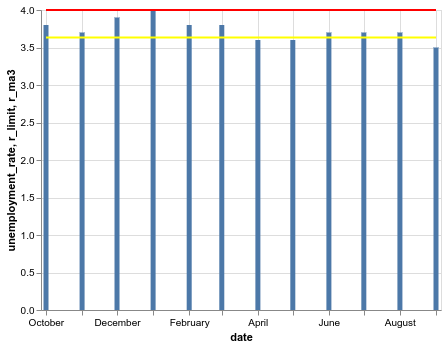

In [122]:
dates = df.index
df['date'] = dates
df['r_min'] = r_min
df['r_limit'] = r_min + 0.5
df['r_ma3'] = r_ma3

base = alt.Chart(df).encode(
    x='date:T'
)
bars = base.mark_bar().encode(
    y='unemployment_rate:Q'
)
rule = base.mark_line(color='red').encode(
    y='r_limit:Q',
)
rule2 = base.mark_line(color='yellow').encode(
    y='r_ma3:Q',
)
bars + rule + rule2

If the yellow line crosses the red line then we would have a recession.